### Missing values for year 2017

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import os
from subprocess import check_output
import missingno as msno

data_dir = './zillow data/'
print(check_output(["ls", data_dir]).decode("utf8"))

merged_new2016.csv
properties_2016.csv
properties_2016_new.csv
properties_2017.csv
sample_submission.csv
train_2016_v2.csv
train_2017.csv
zillow_data_dictionary.xlsx



In [2]:
train_2017  = pd.read_csv('./zillow data/train_2017.csv')

In [3]:
properties_2017 = pd.read_csv('./zillow data/properties_2017.csv')

In [4]:
zillow_dictionary = pd.read_excel('./zillow data/zillow_data_dictionary.xlsx')

### Missing value

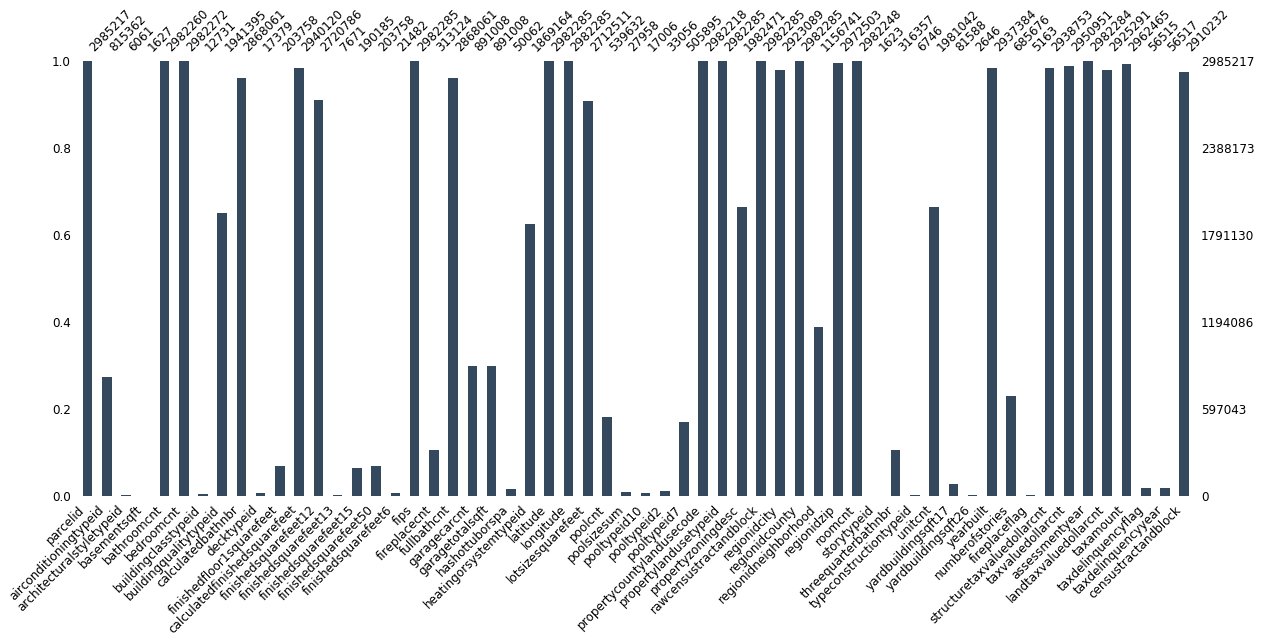

In [6]:
msno.bar(properties_2017,figsize=(20,8),color="#34495e",fontsize=12,labels=True)

In [7]:
for i in properties_2017.columns.values:
    print(i)

parcelid
airconditioningtypeid
architecturalstyletypeid
basementsqft
bathroomcnt
bedroomcnt
buildingclasstypeid
buildingqualitytypeid
calculatedbathnbr
decktypeid
finishedfloor1squarefeet
calculatedfinishedsquarefeet
finishedsquarefeet12
finishedsquarefeet13
finishedsquarefeet15
finishedsquarefeet50
finishedsquarefeet6
fips
fireplacecnt
fullbathcnt
garagecarcnt
garagetotalsqft
hashottuborspa
heatingorsystemtypeid
latitude
longitude
lotsizesquarefeet
poolcnt
poolsizesum
pooltypeid10
pooltypeid2
pooltypeid7
propertycountylandusecode
propertylandusetypeid
propertyzoningdesc
rawcensustractandblock
regionidcity
regionidcounty
regionidneighborhood
regionidzip
roomcnt
storytypeid
threequarterbathnbr
typeconstructiontypeid
unitcnt
yardbuildingsqft17
yardbuildingsqft26
yearbuilt
numberofstories
fireplaceflag
structuretaxvaluedollarcnt
taxvaluedollarcnt
assessmentyear
landtaxvaluedollarcnt
taxamount
taxdelinquencyflag
taxdelinquencyyear
censustractandblock


### Dropping some of features missing more than 95% data and highly correlated

In [15]:
dropped_features = ['airconditioningtypeid', 'architecturalstyletypeid', 'decktypeid', 'threequarterbathnbr', 'fullbathcnt',
                     'basementsqft', 'buildingclasstypeid', 'calculatedbathnbr', 'finishedsquarefeet6', 'finishedsquarefeet12', 
                     'finishedsquarefeet13','finishedsquarefeet15', 'finishedsquarefeet50', 'hashottuborspa',
                     'pooltypeid2', 'pooltypeid7', 'pooltypeid10', 'poolsizesum', 'propertycountylandusecode', 'propertyzoningdesc', 
                     'typeconstructiontypeid', 'yardbuildingsqft17', 'yardbuildingsqft26', 'fireplaceflag']

In [64]:
properties_2017_new = properties_2017.drop(dropped_features, axis = 1)

In [65]:
properties_2017_new = properties_2017_new.drop('taxdelinquencyyear', axis = 1)

In [66]:
properties_2017_new = properties_2017_new.drop('taxdelinquencyflag', axis = 1)

In [88]:
properties_2017_new = properties_2017_new.drop('storytypeid', axis = 1)

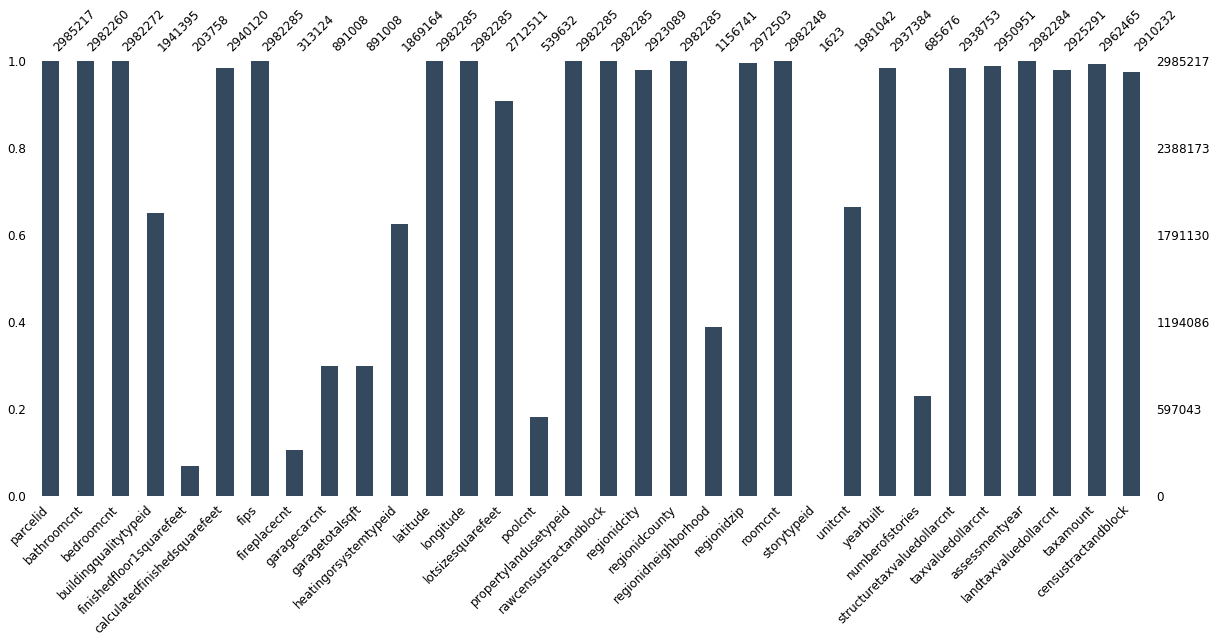

In [67]:
msno.bar(properties_2017_new,figsize=(20,8),color="#34495e",fontsize=12,labels=True)

### Dealing with Missing value

In [69]:
print('each feature missing value:')
properties_2017_new.isnull().sum().sort_values()

each feature missing value:


parcelid                              0
regionidcounty                     2932
rawcensustractandblock             2932
longitude                          2932
latitude                           2932
fips                               2932
propertylandusetypeid              2932
assessmentyear                     2933
bedroomcnt                         2945
bathroomcnt                        2957
roomcnt                            2969
regionidzip                       12714
taxamount                         22752
taxvaluedollarcnt                 34266
calculatedfinishedsquarefeet      45097
structuretaxvaluedollarcnt        46464
yearbuilt                         47833
landtaxvaluedollarcnt             59926
regionidcity                      62128
censustractandblock               74985
lotsizesquarefeet                272706
unitcnt                         1004175
buildingqualitytypeid           1043822
heatingorsystemtypeid           1116053
regionidneighborhood            1828476


In [22]:
properties_2017_new.shape

(2985217, 34)

### Filling missing value of features that has little missing value by mode

In [70]:
p1 = properties_2017_new['latitude']
p1[p1.isna()] = p1.mode()[0]
properties_2017_new['latitude'] = p1

p1 = properties_2017_new['longitude']
p1[p1.isna()] = p1.mode()[0]
properties_2017_new['longitude'] = p1

p1 = properties_2017_new['regionidcounty']
p1[p1.isna()] = p1.mode()[0]
properties_2017_new['regionidcounty'] = p1

p1 = properties_2017_new['propertylandusetypeid']
p1[p1.isna()] = p1.mode()[0]
properties_2017_new['propertylandusetypeid'] = p1

p1 = properties_2017_new['fips']
p1[p1.isna()] = p1.mode()[0]
properties_2017_new['fips'] = p1

p1 = properties_2017_new['assessmentyear']
p1[p1.isna()] = p1.mode()[0]
properties_2017_new['assessmentyear'] = p1

p1 = properties_2017_new['rawcensustractandblock']
p1[p1.isna()] = p1.mode()[0]
properties_2017_new['rawcensustractandblock'] = p1

p1 = properties_2017_new['bedroomcnt']
p1[p1.isna()] = p1.mode()[0]
properties_2017_new['bedroomcnt'] = p1

p1 = properties_2017_new['bathroomcnt']
p1[p1.isna()] = p1.mode()[0]
properties_2017_new['bathroomcnt'] = p1

p1 = properties_2017_new['roomcnt']
p1[p1.isna()] = p1.mode()[0]
properties_2017_new['roomcnt'] = p1

In [71]:
properties_2017_new.isnull().sum().sort_values()

parcelid                              0
assessmentyear                        0
roomcnt                               0
regionidcounty                        0
rawcensustractandblock                0
longitude                             0
latitude                              0
propertylandusetypeid                 0
fips                                  0
bathroomcnt                           0
bedroomcnt                            0
regionidzip                       12714
taxamount                         22752
taxvaluedollarcnt                 34266
calculatedfinishedsquarefeet      45097
structuretaxvaluedollarcnt        46464
yearbuilt                         47833
landtaxvaluedollarcnt             59926
regionidcity                      62128
censustractandblock               74985
lotsizesquarefeet                272706
unitcnt                         1004175
buildingqualitytypeid           1043822
heatingorsystemtypeid           1116053
regionidneighborhood            1828476


### Filing missing value features related to location by KNN   ---- regionidcity, regionidzip, regionidneigborhood, unitcnt, roomcnt, numbeofstories, buildingquantitytypeid

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

def KNN_performance(train_feature_list, target_feature,k_list = [1,2,3,4,5,6,7,8,9,10,20,50,100], model = 'class',flag = True):
    
    location = properties_2017_new[train_feature_list]
    target = properties_2017_new[target_feature]
    index_na = target[target.isna()].index.values
    index_notna = target[target.notna()].index.values

    X_train = location.loc[index_notna,:].values
    y_train = target.loc[index_notna].values
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

    for k in k_list:
        #KNN_train(X_train,y_train,X_test)
                
        if model == 'class':
            knn= KNeighborsClassifier(n_neighbors=k)
            knn.fit(X_train,y_train)
            y_pred = knn.predict(X_test)
            result = accuracy_score(y_test,y_pred)
            print(k,result)
            if flag is False:
                if result >=  0.8:
                    print('related features')
                    break
                    
        if model == 'reg':
            scaler = StandardScaler(with_mean=True, with_std=True)
            X_train = scaler.fit_transform(X_train)
            y_train = scaler.fit_transform(y_train.ravel())
            knn= KNeighborsRegressor(n_neighbors=k)
            knn.fit(X_train,y_train)
            y_pred = knn.predict(X_test)
            result = mean_squared_error(y_test,y_pred)
            print(k,result)
            print(k,result)
            if flag is False:
                if result <= 0.05:
                    print('related features')
                    break
        
def KNN_train(k,train_feature_list, target_feature, model = 'class'):
    location = properties_2017_new[train_feature_list]
    target = properties_2017_new[target_feature]
    index_na = target[target.isna()].index.values
    index_notna = target[target.notna()].index.values

    X_train = location.loc[index_notna,:].values
    y_train = target.loc[index_notna].values
    X_test = location.loc[index_na,:].values
    
    print('begin train ......')
    if model == 'class':
        knn= KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_pred = knn.predict(X_test)
    if model == 'reg':
        knn= KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_pred = knn.predict(X_test)
    print('successful')
    return y_pred

def merge_result(target_feature, y_pred):
    target = properties_2017_new[target_feature]
    index_na = target[target.isna()].index.values
    index_notna = target[target.notna()].index.values
    p1 = target.loc[index_na]
    p2 = pd.Series(y_pred, index=p1.index.values)
    p3 = target[target.notna()]
    p2 = p2.append(p3)
    p2 = p2.sort_index(axis = 0)
    properties_2017_new[target_feature] = p2
    print('successfully done.')

In [56]:
target_feature = 'regionidcity'
train_feature_list = ['latitude','longitude']
KNN_performance(train_feature_list, target_feature)

1 0.9974290394144845
2 0.9967189152205014
3 0.997149136447513
4 0.9966515311728971
5 0.996870270158197
6 0.9965364599531422
7 0.9966442744293089
8 0.9963394911986067
9 0.9964410856088408
10 0.9961860629056001
20 0.9949959569571437
50 0.9922612013020672
100 0.9891719018888266


In [72]:
y_pred = KNN_train(1,train_feature_list,target_feature)
merge_result(target_feature,y_pred)

begin train ......
successful
successfully done.


In [73]:
target_feature = 'regionidzip'
train_feature_list = ['latitude','longitude']
KNN_performance(train_feature_list, target_feature)

1 0.9970701153807728
2 0.9957958092659385
3 0.9960792149458777
4 0.9953707007460297
5 0.9955073063615401
6 0.995114820078171
7 0.9952881257097885
8 0.9950944311803337
9 0.9952300173509521
10 0.9950138950338762
20 0.9939710029094957
50 0.9906598459007101
100 0.9860662272179552


In [74]:
target_feature = 'regionidzip'
train_feature_list = ['latitude','longitude']
y_pred = KNN_train(1,train_feature_list,target_feature)
merge_result(target_feature,y_pred)

begin train ......
successful
successfully done.


In [75]:
target_feature = 'regionidneighborhood'
train_feature_list = ['latitude','longitude']
KNN_performance(train_feature_list, target_feature)

1 0.9944200668020171
2 0.9935424716746348
3 0.9941554784203288
4 0.9933721920230533
5 0.9934429235706334
6 0.9929582814853625
7 0.9929818586678892
8 0.9925129347043028
9 0.9924160062872487
10 0.9920623485493484
20 0.9895710262623616
50 0.98460671949702
100 0.9789141397602986


In [76]:
target_feature = 'regionidneighborhood'
train_feature_list = ['latitude','longitude']
y_pred = KNN_train(1,train_feature_list,target_feature)
merge_result(target_feature,y_pred)

begin train ......
successful
successfully done.


In [77]:
target_feature = 'unitcnt'
train_feature_list = ['latitude','longitude']
KNN_performance(train_feature_list, target_feature)

1 0.8969137766465161
2 0.9099479306884652
3 0.9068978070926846
4 0.9086217234880932
5 0.9082882596245625
6 0.9093620744511614
7 0.9090163733816295
8 0.9094385569886684
9 0.909359015149661
10 0.9098194400254533
20 0.9093987860691647
50 0.9081704765168017
100 0.907293986636971


In [78]:
target_feature = 'unitcnt'
train_feature_list = ['latitude','longitude']
y_pred = KNN_train(2,train_feature_list,target_feature)
merge_result(target_feature,y_pred)

begin train ......
successful
successfully done.


In [83]:
target_feature = 'numberofstories'
train_feature_list = ['latitude','longitude','yearbuilt']
KNN_performance(train_feature_list, target_feature)

1 0.7446458718191219
2 0.7541829816947595
3 0.7739245339720869
4 0.7750514862511821
5 0.785556449260631
6 0.7848626002103645
7 0.7909348842553718
8 0.7892201490228661
9 0.7932153053377763
10 0.7927424273226266
20 0.7950316872464357
50 0.7863740420905627
100 0.7727710651687777


In [84]:
target_feature = 'numberofstories'
train_feature_list = ['latitude','longitude']
y_pred = KNN_train(20,train_feature_list,target_feature)
merge_result(target_feature,y_pred)

begin train ......
successful
successfully done.


In [85]:
target_feature = 'buildingqualitytypeid'
train_feature_list = ['latitude','longitude','yearbuilt']
KNN_performance(train_feature_list, target_feature)

1 0.6660854960735865
2 0.6716297698782976
3 0.6766683160048762
4 0.6801303653570296
5 0.6817193492346186
6 0.6833676468522354
7 0.682755778797211
8 0.6837968910234898
9 0.6829571333357267
10 0.6829867902057406
20 0.6742146002331967
50 0.648114993733035
100 0.6211490944508874


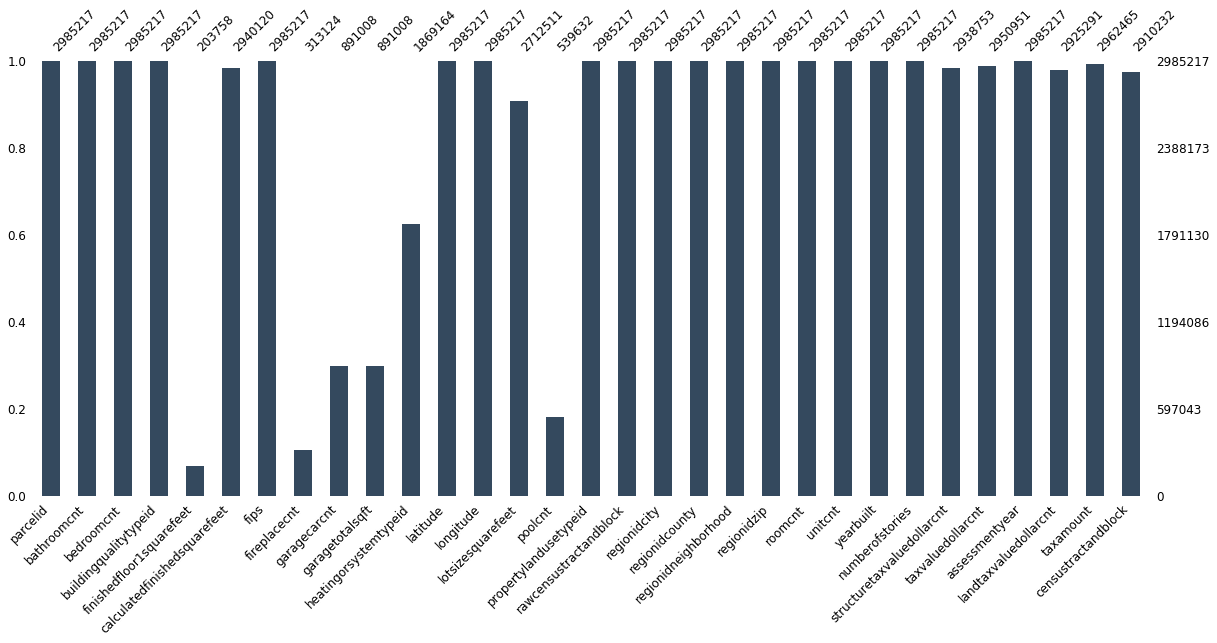

In [89]:
msno.bar(properties_2017_new,figsize=(20,8),color="#34495e",fontsize=12,labels=True)

### Filling missing value with mean ---- year built

In [82]:
p1 = properties_2017_new['yearbuilt']
p1 = 2018 - p1
properties_2017_new['yearbuilt'] = p1
p1[p1.isna()] = p1.mean()
properties_2017_new['yearbuilt'] = p1

In [86]:
properties_2017_new['buildingqualitytypeid'] = p1
p1[p1.isna()] = p1.mean()
properties_2017_new['buildingqualitytypeid'] = p1

In [101]:
p1 = properties_2017_new['lotsizesquarefeet']
p1[p1.isna()] = p1.mean()
properties_2017_new['lotsizesquarefeet'] = p1

### Filling with most frequent data

In [96]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
X_new = imp.fit_transform(properties_2017_new['calculatedfinishedsquarefeet'].values.reshape(-1,1))
properties_2017_new['calculatedfinishedsquarefeet'] = X_new

In [100]:
p1 = properties_2017_new['heatingorsystemtypeid']
p1[p1.isna()] = 2
properties_2017_new['heatingorsystemtypeid'] = p1

In [114]:
p1 = properties_2017_new['censustractandblock']
p1[p1.isna()] = p1.mode()[0]
properties_2017_new['censustractandblock'] = p1

### Filling missing value as another type

In [97]:
p1 = properties_2017_new['fireplacecnt']
p1[p1.isna()] = 0.0
properties_2017_new['fireplacecnt'] = p1

In [98]:
p1 = properties_2017_new['garagecarcnt']
p1[p1.isna()] = 0.0
properties_2017_new['garagecarcnt'] = p1

In [99]:
p1 = properties_2017_new['garagetotalsqft']
p1[p1.isna()] = 0.0
properties_2017_new['garagetotalsqft'] = p1

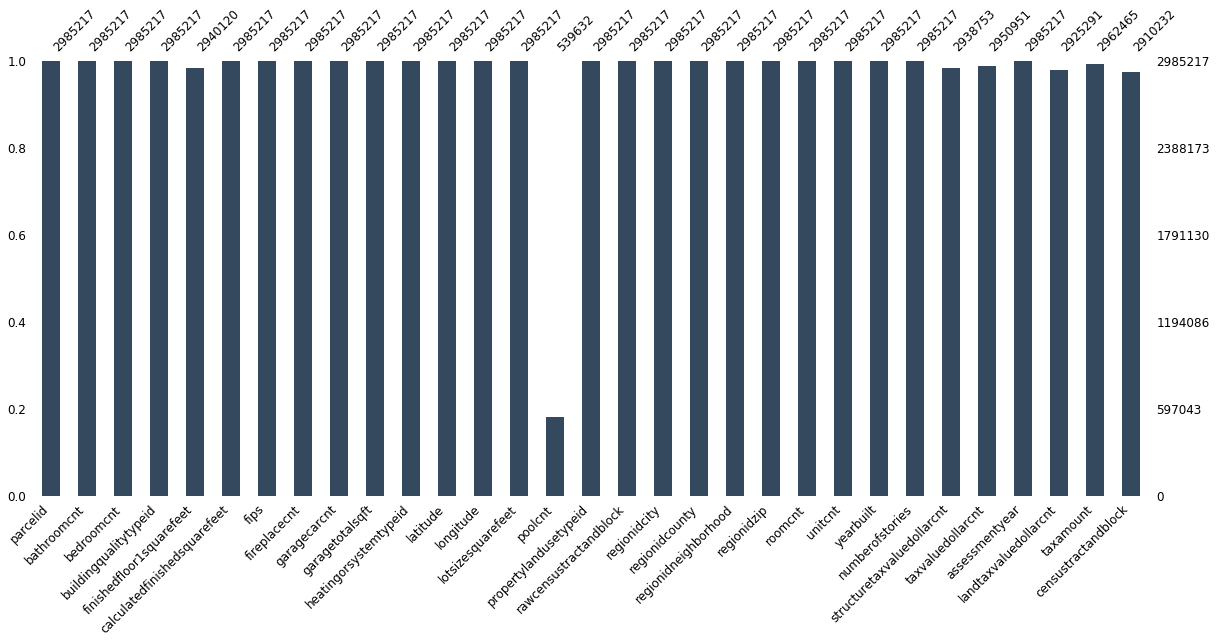

In [102]:
msno.bar(properties_2017_new,figsize=(20,8),color="#34495e",fontsize=12,labels=True)

### Other faetures

### Floor 1 area ---- total area divide number of stories

In [103]:
stories = properties_2017_new['numberofstories'].unique()

In [104]:
for i in stories:
    p1 = properties_2017_new.loc[(properties_2017_new['finishedfloor1squarefeet'].isnull()) & (properties_2017_new['numberofstories']==i),'calculatedfinishedsquarefeet']
    p1 = p1/i   
    properties_2017_new.loc[(properties_2017_new['finishedfloor1squarefeet'].isnull()) & (properties_2017_new['numberofstories']== i),'finishedfloor1squarefeet']  = p1

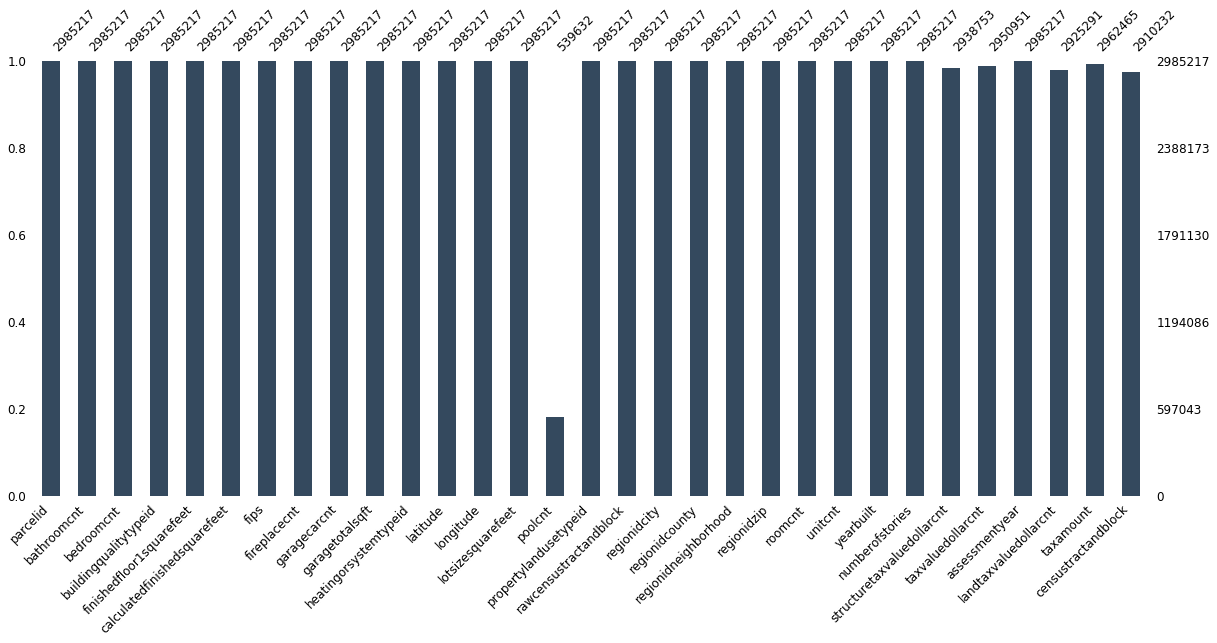

In [105]:
msno.bar(properties_2017_new,figsize=(20,8),color="#34495e",fontsize=12,labels=True)

### Pool Feature

In [107]:
p0 = properties_2017['pooltypeid10']
p1 = properties_2017['pooltypeid2']
p2 = properties_2017['hashottuborspa']
p3 = properties_2017['pooltypeid7']
p4 = properties_2017['poolcnt']
p5 = properties_2017['poolsizesum']

In [109]:
p4 = p4.fillna(0)
p0 = p0.fillna(0)
p1 = p1.fillna(0)
p3 = p3.fillna(0)

In [110]:
p_new = p0+p4
p_new.unique()

array([0., 1.])

In [111]:
properties_2017_new['poolcnt'] = p_new

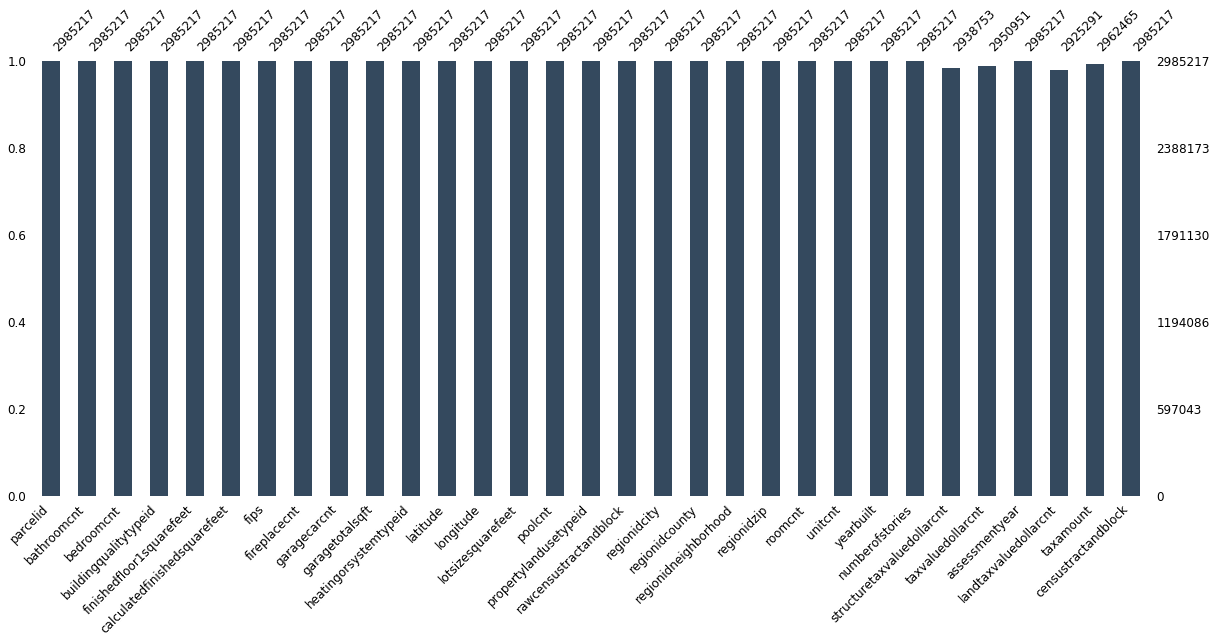

In [115]:
msno.bar(properties_2017_new,figsize=(20,8),color="#34495e",fontsize=12,labels=True)

In [116]:
properties_2017_new.isna().sum()

parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid               0
finishedfloor1squarefeet            0
calculatedfinishedsquarefeet        0
fips                                0
fireplacecnt                        0
garagecarcnt                        0
garagetotalsqft                     0
heatingorsystemtypeid               0
latitude                            0
longitude                           0
lotsizesquarefeet                   0
poolcnt                             0
propertylandusetypeid               0
rawcensustractandblock              0
regionidcity                        0
regionidcounty                      0
regionidneighborhood                0
regionidzip                         0
roomcnt                             0
unitcnt                             0
yearbuilt                           0
numberofstories                     0
structuretaxvaluedollarcnt      46464
taxvaluedoll

### Tax related data

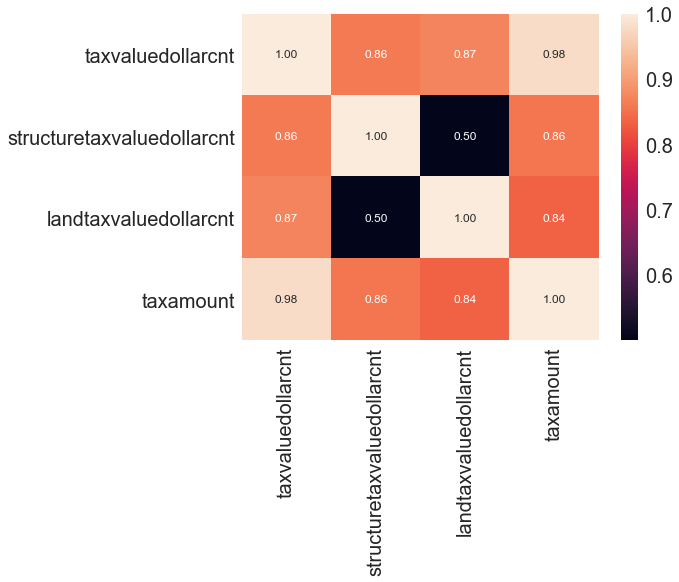

taxvaluedollarcnt             34266
structuretaxvaluedollarcnt    46464
landtaxvaluedollarcnt         59926
taxamount                     22752
dtype: int64

In [117]:
import seaborn as sns
cols = ['taxvaluedollarcnt','structuretaxvaluedollarcnt','landtaxvaluedollarcnt','taxamount']
cor_matrix = properties_2017_new[cols].corr()
mask = np.zeros_like(cor_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (8,6))
sns.set(font_scale = 2)
hm = sns.heatmap(cor_matrix, cbar = True, annot = True, fmt = '.2f', annot_kws = {'size':12},
                 yticklabels = cols,
                 xticklabels = cols)
plt.savefig('corr.jpg')
plt.show()
properties_2017_new[cols].isnull().sum()

In [118]:
p1 = properties_2017_new[cols]

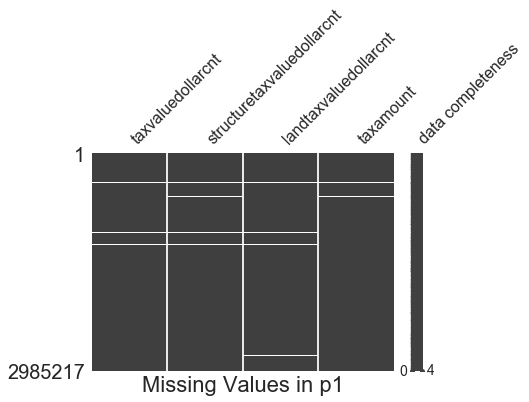

In [121]:
file = 'p1'
msno.matrix(df=eval(file), figsize=(6,4),labels= True)
plt.xlabel('Missing Values in ' + file)
plt.show()

In [123]:
p1.loc[p1['landtaxvaluedollarcnt'].isna() & (p1['taxvaluedollarcnt'].notna() & p1['structuretaxvaluedollarcnt'].notna()),'landtaxvaluedollarcnt'] = p1.loc[p1['landtaxvaluedollarcnt'].isna() & (p1['taxvaluedollarcnt'].notna() & p1['structuretaxvaluedollarcnt'].notna()),'taxvaluedollarcnt'] - p1.loc[p1['landtaxvaluedollarcnt'].isna() & (p1['taxvaluedollarcnt'].notna() & p1['structuretaxvaluedollarcnt'].notna()),'structuretaxvaluedollarcnt']

In [124]:
p1.loc[p1['structuretaxvaluedollarcnt'].isna() & (p1['taxvaluedollarcnt'].notna() & p1['landtaxvaluedollarcnt'].notna()),'structuretaxvaluedollarcnt'] = p1.loc[p1['structuretaxvaluedollarcnt'].isna() & (p1['taxvaluedollarcnt'].notna() & p1['landtaxvaluedollarcnt'].notna()),'taxvaluedollarcnt'] - p1.loc[p1['structuretaxvaluedollarcnt'].isna() & (p1['taxvaluedollarcnt'].notna() & p1['landtaxvaluedollarcnt'].notna()),'landtaxvaluedollarcnt']

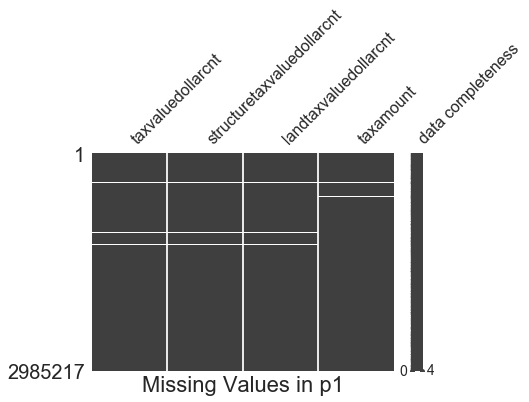

In [125]:
file = 'p1'
msno.matrix(df=eval(file), figsize=(6,4),labels= True)
plt.xlabel('Missing Values in ' + file)
plt.show()

In [127]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

pre1  = 'landtaxvaluedollarcnt'
pre2 = 'structuretaxvaluedollarcnt'
pre3 = 'taxvaluedollarcnt'
tar = 'taxamount'

predictor= p1[[pre1,pre2,pre3,tar]]
target = p1[tar]

X_train = predictor.loc[predictor[pre1].notna() & predictor[pre2].notna() & predictor[pre3].notna() & predictor[tar].notna(),[pre1,pre2,pre3]].values
y_train = predictor.loc[predictor[pre1].notna() & predictor[pre2].notna() & predictor[pre3].notna() & predictor[tar].notna(),tar].values
X_test = predictor.loc[predictor[pre1].notna() & predictor[pre2].notna() & predictor[pre3].notna() & predictor[tar].isna(),[pre1,pre2,pre3]].values

X_train = StandardScaler(with_mean=True, with_std=True).fit_transform(X_train)
y_train = StandardScaler(with_mean=True, with_std=True).fit_transform(y_train.reshape(-1,1))
X_test = StandardScaler(with_mean=True, with_std=True).fit_transform(X_test)

print('begin train ......')
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

print('train mse:', mean_squared_error(y_train,y_pred_train))
print('successful')

begin train ......
train mse: 0.04022509270933997
successful


In [128]:
y_pred = y_pred.ravel()
p1.loc[predictor[pre1].notna() & predictor[pre2].notna() & predictor[pre3].notna() & predictor[tar].isna(),tar] = y_pred

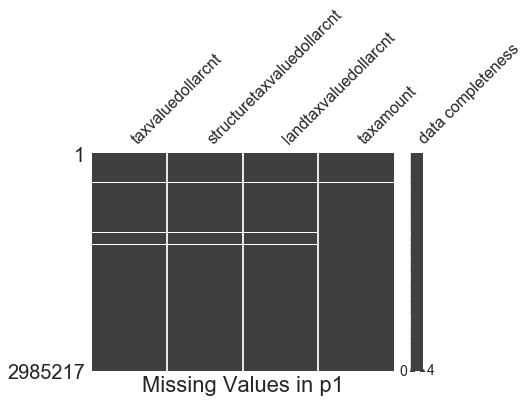

In [129]:
file = 'p1'
msno.matrix(df=eval(file), figsize=(6,4),labels= True)
plt.xlabel('Missing Values in ' + file)
plt.show()

In [130]:
p2 = p1['taxvaluedollarcnt']
p2[p2.isna()] = p2.mean()
p3 = p1['landtaxvaluedollarcnt']
p3[p3.isna()] = p3.mean()
p4 = p1['structuretaxvaluedollarcnt']
p4[p4.isna()] = p4.mean()
p5 = p1['taxamount']
p5[p5.isna()] = p5.mean()

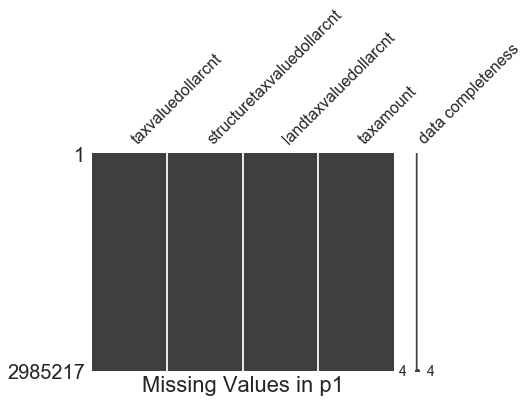

In [131]:
file = 'p1'
msno.matrix(df=eval(file), figsize=(6,4),labels= True)
plt.xlabel('Missing Values in ' + file)
plt.show()

In [132]:
properties_2017_new[cols] = p1

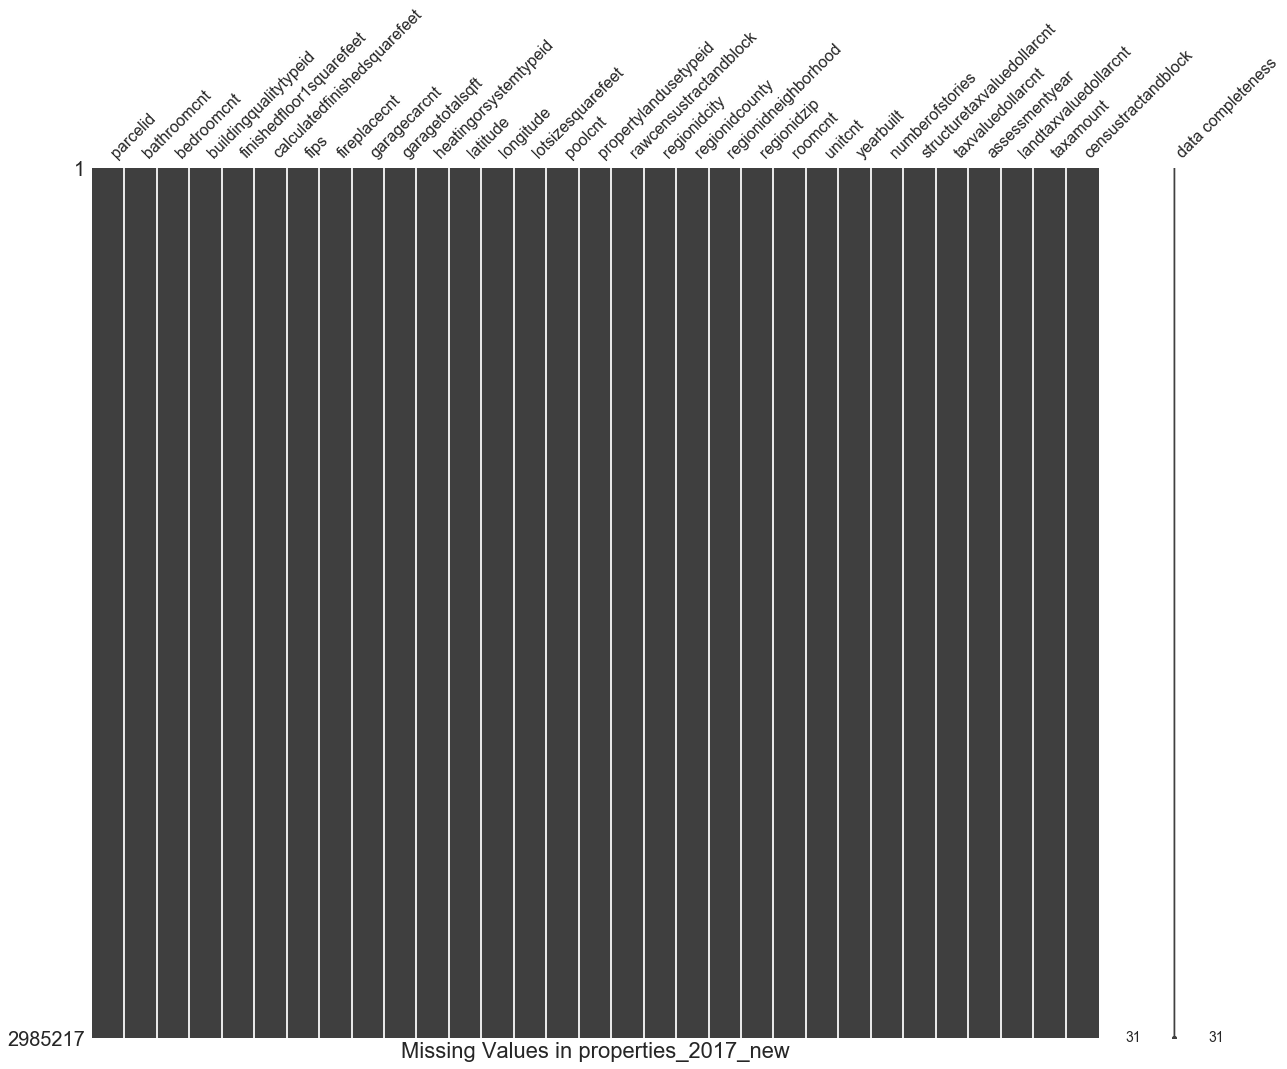

In [143]:
file = 'properties_2017_new'
msno.matrix(df=eval(file), figsize=(20,16),labels= True)
plt.xlabel('Missing Values in ' + file)
plt.show()

### Summary and save data

In [133]:
properties_2017_new.isna().sum()

parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
finishedfloor1squarefeet        0
calculatedfinishedsquarefeet    0
fips                            0
fireplacecnt                    0
garagecarcnt                    0
garagetotalsqft                 0
heatingorsystemtypeid           0
latitude                        0
longitude                       0
lotsizesquarefeet               0
poolcnt                         0
propertylandusetypeid           0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidneighborhood            0
regionidzip                     0
roomcnt                         0
unitcnt                         0
yearbuilt                       0
numberofstories                 0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount     

In [186]:
merged_2017 = pd.merge(train_2017,properties_2017_new,on="parcelid",how="left")
merged_2017.to_csv('./zillow data/merged_new2017.csv')
properties_2017_new.to_csv('./zillow data/properties_2017_new.csv')

### Handling last 1000 rows of properties_2016_data

In [137]:
properties_2016 = pd.read_csv('./zillow data/properties_2016.csv')

In [172]:
properties_2016_new = pd.read_csv('./zillow data/properties_2016_new.csv')

In [173]:
properties_2016_new.head()

,Unnamed: 0,Unnamed: 0.1,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,fireplacecnt,garagecarcnt,garagetotalsqft,...,taxamount,censustractandblock,haspoolornot,regionidneighborhood,unitcnt,roomcnt,buildingqualitytypeid,numberofstories,lotsizesquarefeet,finishedfloor1squarefeet
0,0,0,10754147,0.0,0.0,1440.0,6037.0,0.0,0.0,0.0,...,-2.418453e+08,6.037920e+13,0.0,51224.0,1.0,0.0,1.0,1.0,85768.0,1440.0
1,1,1,10759547,0.0,0.0,1440.0,6037.0,0.0,0.0,0.0,...,-2.387687e+08,6.037920e+13,0.0,763011.0,1.0,0.0,7.0,1.0,4083.0,1440.0
2,2,2,10843547,0.0,0.0,73026.0,6037.0,0.0,0.0,0.0,...,2.080037e+04,6.037920e+13,0.0,762186.0,2.0,0.0,7.0,1.0,63085.0,73026.0
3,3,3,10859147,0.0,0.0,5068.0,6037.0,0.0,0.0,0.0,...,1.455757e+04,6.037920e+13,0.0,27080.0,1.0,0.0,7.0,1.0,7521.0,5068.0
4,4,4,10879947,0.0,0.0,1776.0,6037.0,0.0,0.0,0.0,...,5.725170e+03,6.037920e+13,0.0,46795.0,1.0,0.0,7.0,1.0,8512.0,1776.0


In [174]:
properties_2016_new = properties_2016_new.drop('Unnamed: 0', axis = 1)

In [175]:
properties_2016_new = properties_2016_new.drop('Unnamed: 0.1', axis = 1)

In [176]:
properties_2016.shape

(2985217, 58)

In [177]:
properties_2016_new.shape

(2973780, 31)

In [178]:
append = np.zeros((2985217-2973780,31))

In [179]:
append = pd.DataFrame(append,columns= properties_2016_new.columns)

In [169]:
append.shape

(11437, 62)

In [180]:
properties_2016_new = pd.concat([properties_2016_new,append],axis= 0, ignore_index= True)
properties_2016_new.shape

(2985217, 31)

In [183]:
properties_2016_new['parcelid'] = properties_2016['parcelid']

In [185]:
for i in properties_2016_new.columns.values:
    print(i)

parcelid
bathroomcnt
bedroomcnt
calculatedfinishedsquarefeet
fips
fireplacecnt
garagecarcnt
garagetotalsqft
heatingorsystemtypeid
latitude
longitude
propertylandusetypeid
rawcensustractandblock
regionidcity
regionidcounty
regionidzip
yearbuilt
structuretaxvaluedollarcnt
taxvaluedollarcnt
assessmentyear
landtaxvaluedollarcnt
taxamount
censustractandblock
haspoolornot
regionidneighborhood
unitcnt
roomcnt
buildingqualitytypeid
numberofstories
lotsizesquarefeet
finishedfloor1squarefeet


In [189]:
class_feature = ['bathroomcnt','bedroomcnt','fips','fireplacecnt','garagecarcnt','garagetotalsqft','heatingorsystemtypeid',
                 'latitude','longitude','propertylandusetypeid','rawcensustractandblock','regionidcity','regionidcounty',
                 'regionidzip','assessmentyear','censustractandblock','haspoolornot','regionidneighborhood','unitcnt',
                 'roomcnt','buildingqualitytypeid','numberofstories']
quantity_feature = ['structuretaxvaluedollarcnt','taxvaluedollarcnt','landtaxvaluedollarcnt','yearbuilt','taxamount',
                    'lotsizesquarefeet','finishedfloor1squarefeet','calculatedfinishedsquarefeet']

for i in class_feature:
    p1 = properties_2016_new[i].iloc[0:2973780]
    properties_2016_new[i].iloc[2973780:] = p1.mode()[0]

for i in quantity_feature:
    p1 = properties_2016_new[i].iloc[0:2973780]
    properties_2016_new[i].iloc[2973780:] = p1.mean()

In [190]:
properties_2016_new.to_csv('./zillow data/properties_2017_new v2.csv')